In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:39273' processes=4 threads=8, memory=34.36 GB>

In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_hourly.db'
session = cc.database.create_session(db)

In [4]:
expt = ['025deg_jra55_ryf_nostress_cont_hourly','025deg_jra55_ryf_nostress_hourly','025deg_jra55_ryf_nostress_naive']

In [5]:
#dir_list = ['/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_hourly',
#           '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_hourly',
#           '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_naive']
#cc.database.build_index(dir_list, session, update=True)

  2%|▏         | 2/108 [00:00<00:09, 11.63it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_cont_hourly


  4%|▎         | 4/108 [00:00<00:02, 37.57it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_hourly


  1%|          | 1/108 [00:00<00:18,  5.90it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_naive


100%|██████████| 108/108 [00:18<00:00,  5.79it/s]


324

In [5]:
temp_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

In [6]:
temp_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

In [7]:
temp_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

Text(0.5, 1.0, 'Surface heat (Nostress - naive run)')

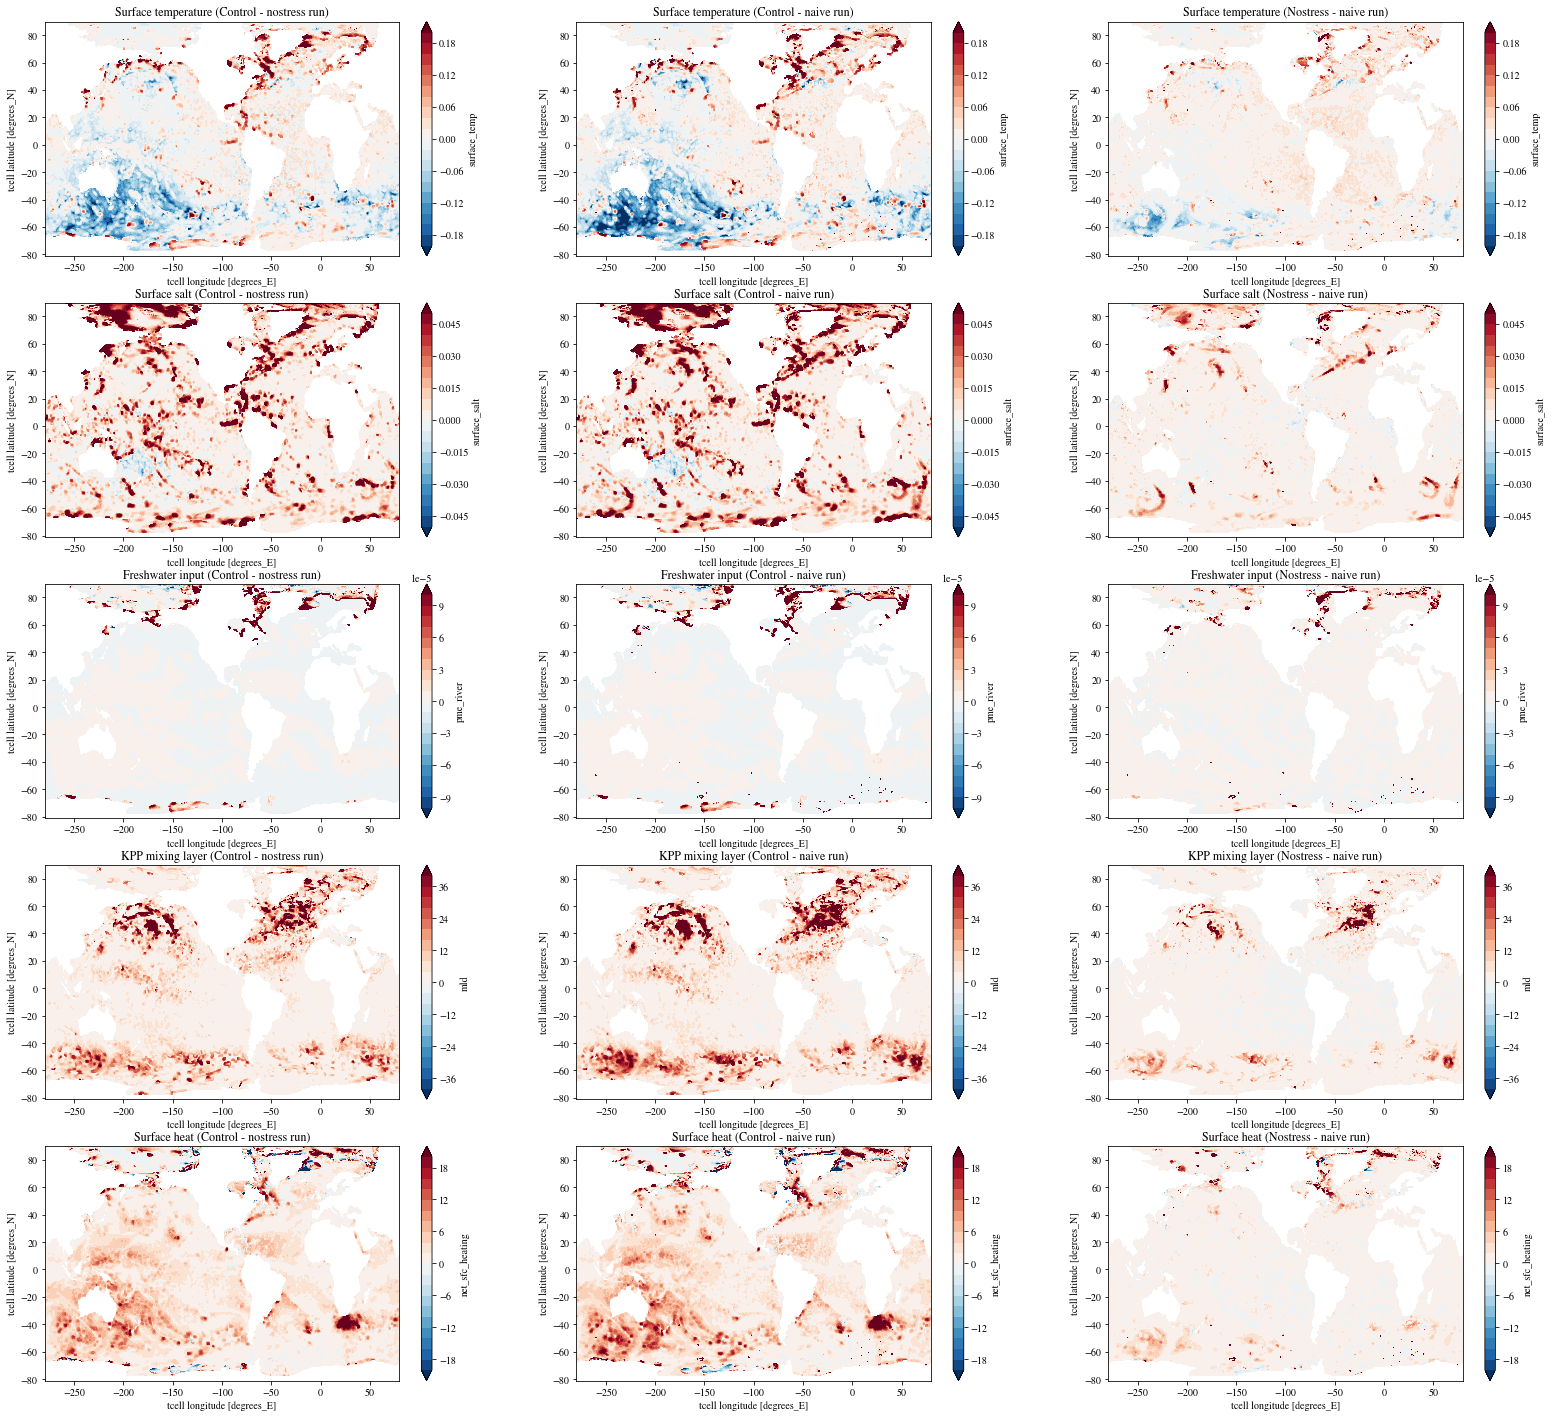

In [8]:
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(27,25))

(temp_sfc_con - temp_sfc_buo).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.2,0.2,21))
axes[0][0].set_title('Surface temperature (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.2,0.2,21))
axes[0][1].set_title('Surface temperature (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.2,0.2,21))
axes[0][2].set_title('Surface temperature (Nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.05,0.05,21))
axes[1][0].set_title('Surface salt (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.05,0.05,21))
axes[1][1].set_title('Surface salt (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.05,0.05,21))
axes[1][2].set_title('Surface salt (Nostress - naive run)')

(pme_river_con - pme_river_buo).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-1e-4,1e-4,21))
axes[2][0].set_title('Freshwater input (Control - nostress run)')

(pme_river_con - pme_river_naive).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-1e-4,1e-4,21))
axes[2][1].set_title('Freshwater input (Control - naive run)')

(pme_river_buo - pme_river_naive).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-1e-4,1e-4,21))
axes[2][2].set_title('Freshwater input (Nostress - naive run)')

(hblt_con - hblt_buo).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-40,40,21))
axes[3][0].set_title('KPP mixing layer (Control - nostress run)')

(hblt_con - hblt_naive).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-40,40,21))
axes[3][1].set_title('KPP mixing layer (Control - naive run)')

(hblt_buo - hblt_naive).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-40,40,21))
axes[3][2].set_title('KPP mixing layer (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-20,20,21))
axes[4][0].set_title('Surface heat (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-20,20,21))
axes[4][1].set_title('Surface heat (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-20,20,21))
axes[4][2].set_title('Surface heat (Nostress - naive run)')

## KPP Diffusivity

In [12]:
cbt_diff_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')
cbt_diff_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')
cbt_diff_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')

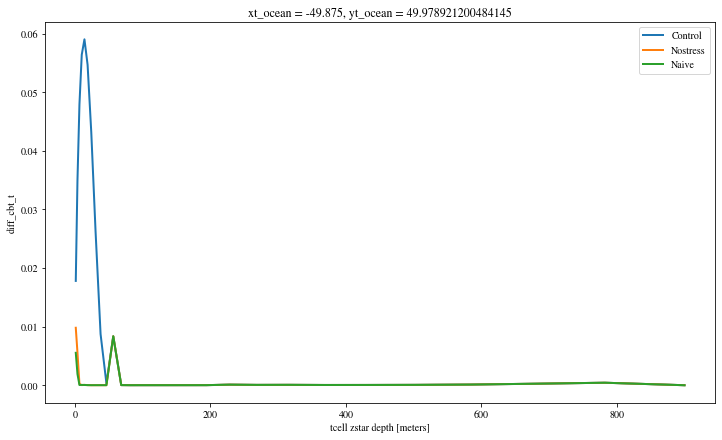

In [33]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

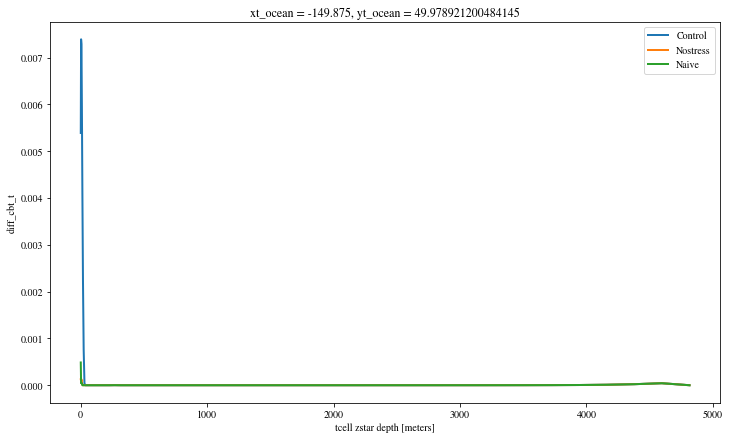

In [34]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

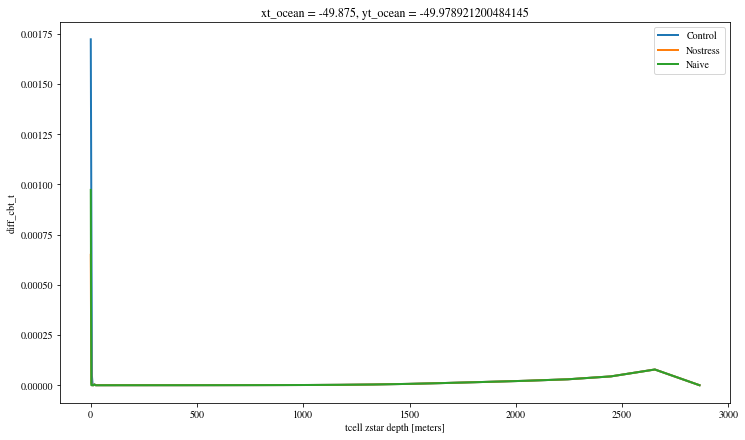

In [35]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

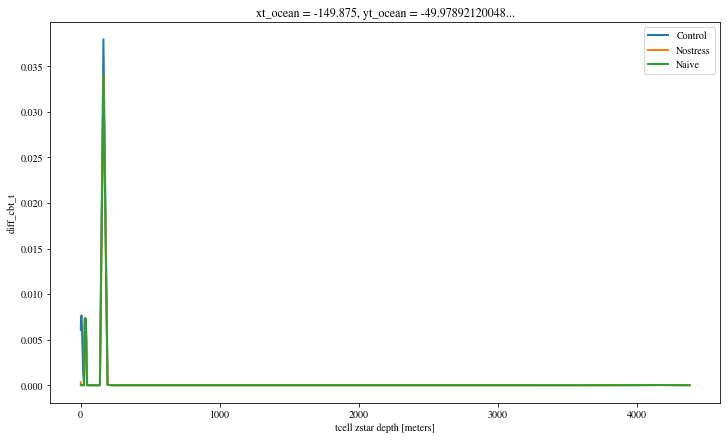

In [36]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

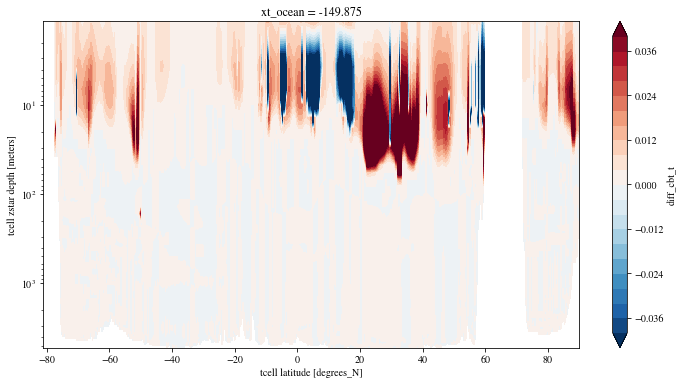

In [75]:
plt.figure(figsize = (12,6))
plt.yscale('log')
(cbt_diff_con - cbt_diff_buo).sel(xt_ocean = -150, method = 'nearest').sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(levels = np.linspace(-4e-2,4e-2,21))
plt.gca().invert_yaxis()
plt.show()

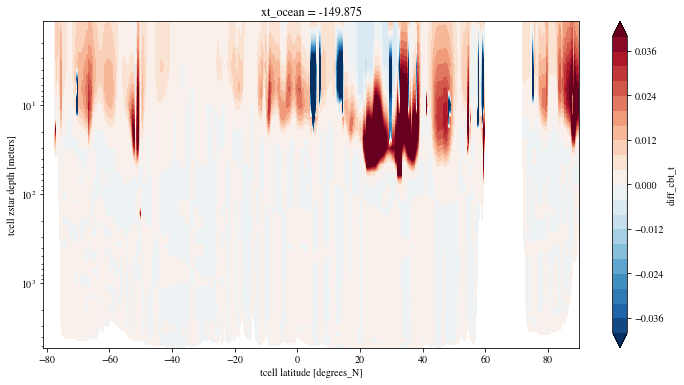

In [76]:
plt.figure(figsize = (12,6))
plt.yscale('log')
(cbt_diff_con - cbt_diff_naive).sel(xt_ocean = -150, method = 'nearest').sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(levels = np.linspace(-4e-2,4e-2,21))
plt.gca().invert_yaxis()
plt.show()

## Hourly Outputs

Text(0.5, 1.0, 'Surface temp 6th hour (Nostress - naive run)')

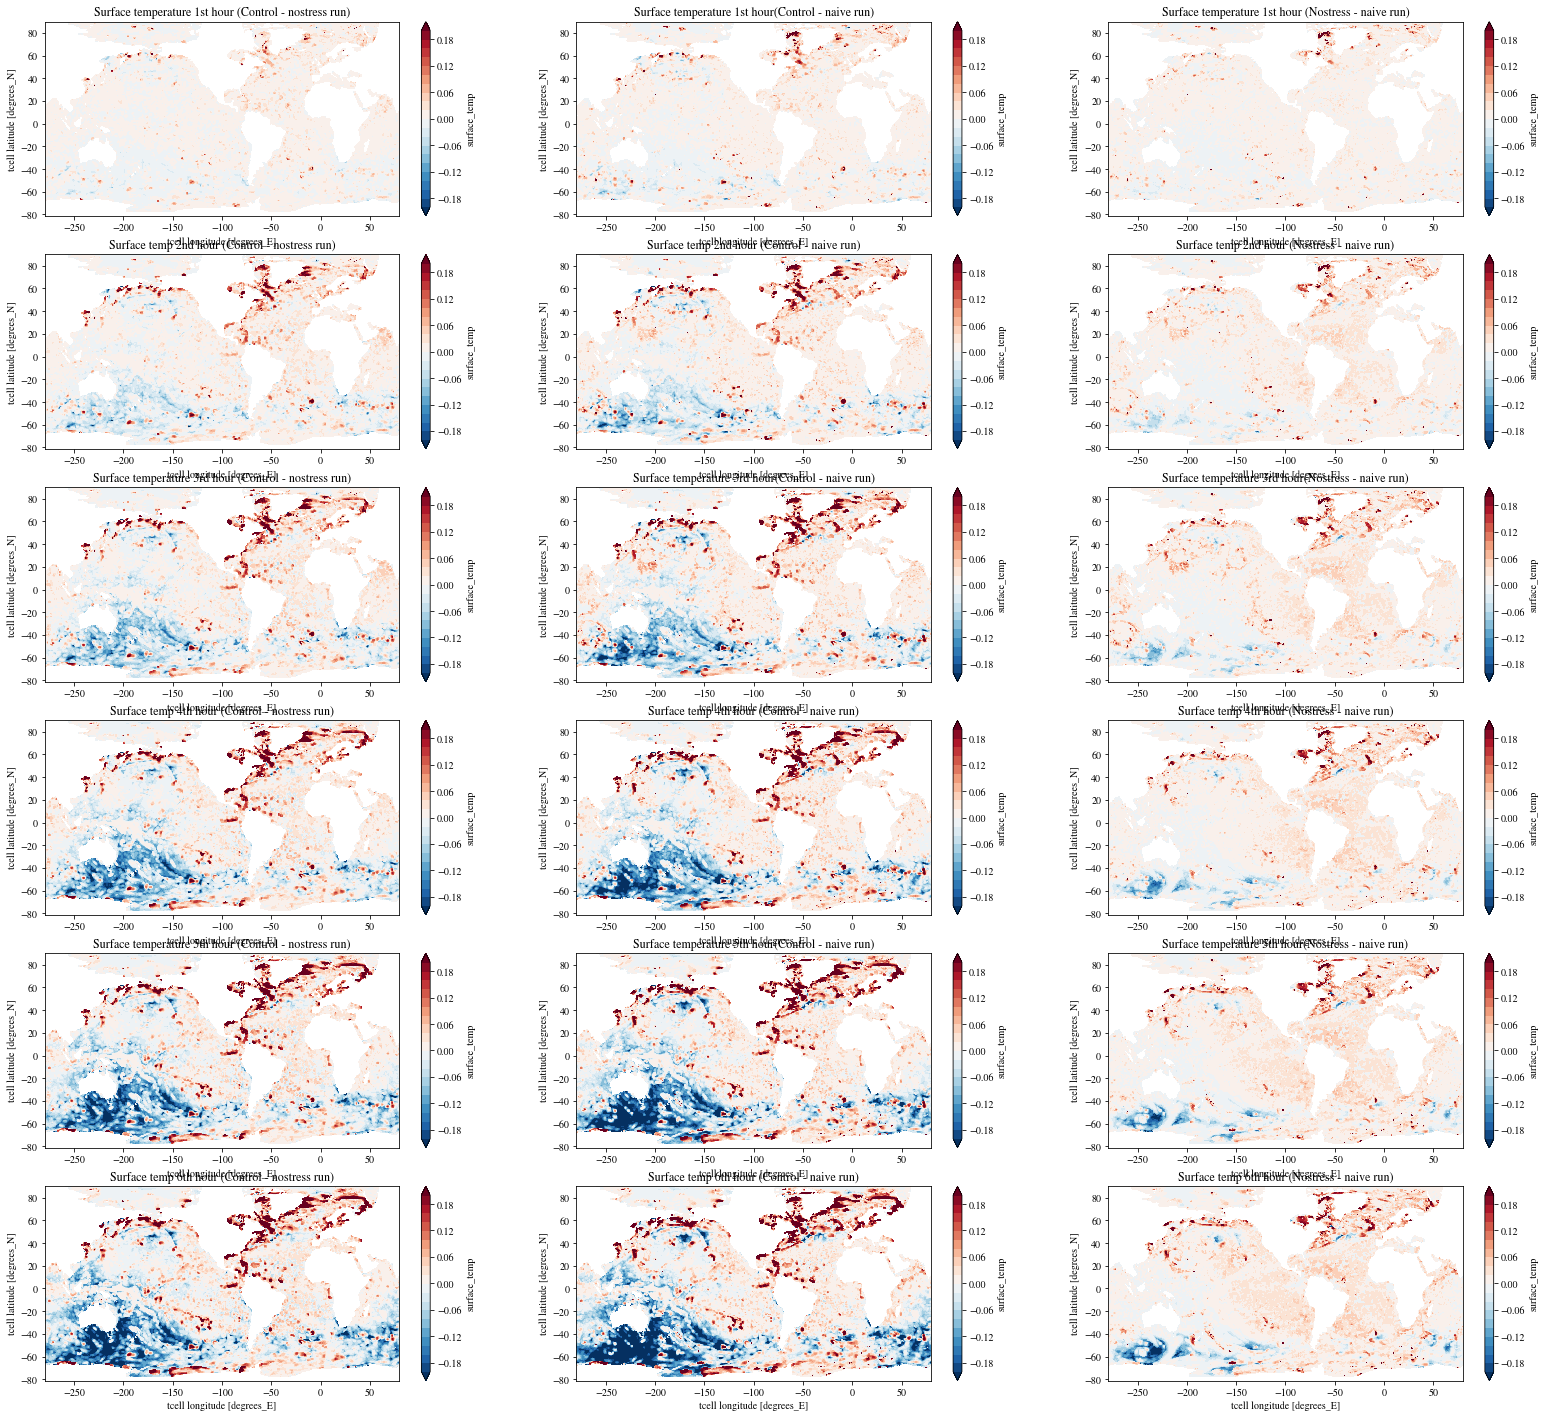

In [9]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,25))

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.2,0.2,21))
axes[0][0].set_title('Surface temperature 1st hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.2,0.2,21))
axes[0][1].set_title('Surface temperature 1st hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.2,0.2,21))
axes[0][2].set_title('Surface temperature 1st hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.2,0.2,21))
axes[1][0].set_title('Surface temp 2nd hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.2,0.2,21))
axes[1][1].set_title('Surface temp 2nd hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.2,0.2,21))
axes[1][2].set_title('Surface temp 2nd hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-0.2,0.2,21))
axes[2][0].set_title('Surface temperature 3rd hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-0.2,0.2,21))
axes[2][1].set_title('Surface temperature 3rd hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-0.2,0.2,21))
axes[2][2].set_title('Surface temperature 3rd hour(Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-0.2,0.2,21))
axes[3][0].set_title('Surface temp 4th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-0.2,0.2,21))
axes[3][1].set_title('Surface temp 4th hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-0.2,0.2,21))
axes[3][2].set_title('Surface temp 4th hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-0.2,0.2,21))
axes[4][0].set_title('Surface temperature 5th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-0.2,0.2,21))
axes[4][1].set_title('Surface temperature 5th hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-0.2,0.2,21))
axes[4][2].set_title('Surface temperature 5th hour(Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-0.2,0.2,21))
axes[5][0].set_title('Surface temp 6th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-0.2,0.2,21))
axes[5][1].set_title('Surface temp 6th hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-0.2,0.2,21))
axes[5][2].set_title('Surface temp 6th hour (Nostress - naive run)')

Text(0.5, 1.0, 'Surface salinity 6th hour (nostress - naive run)')

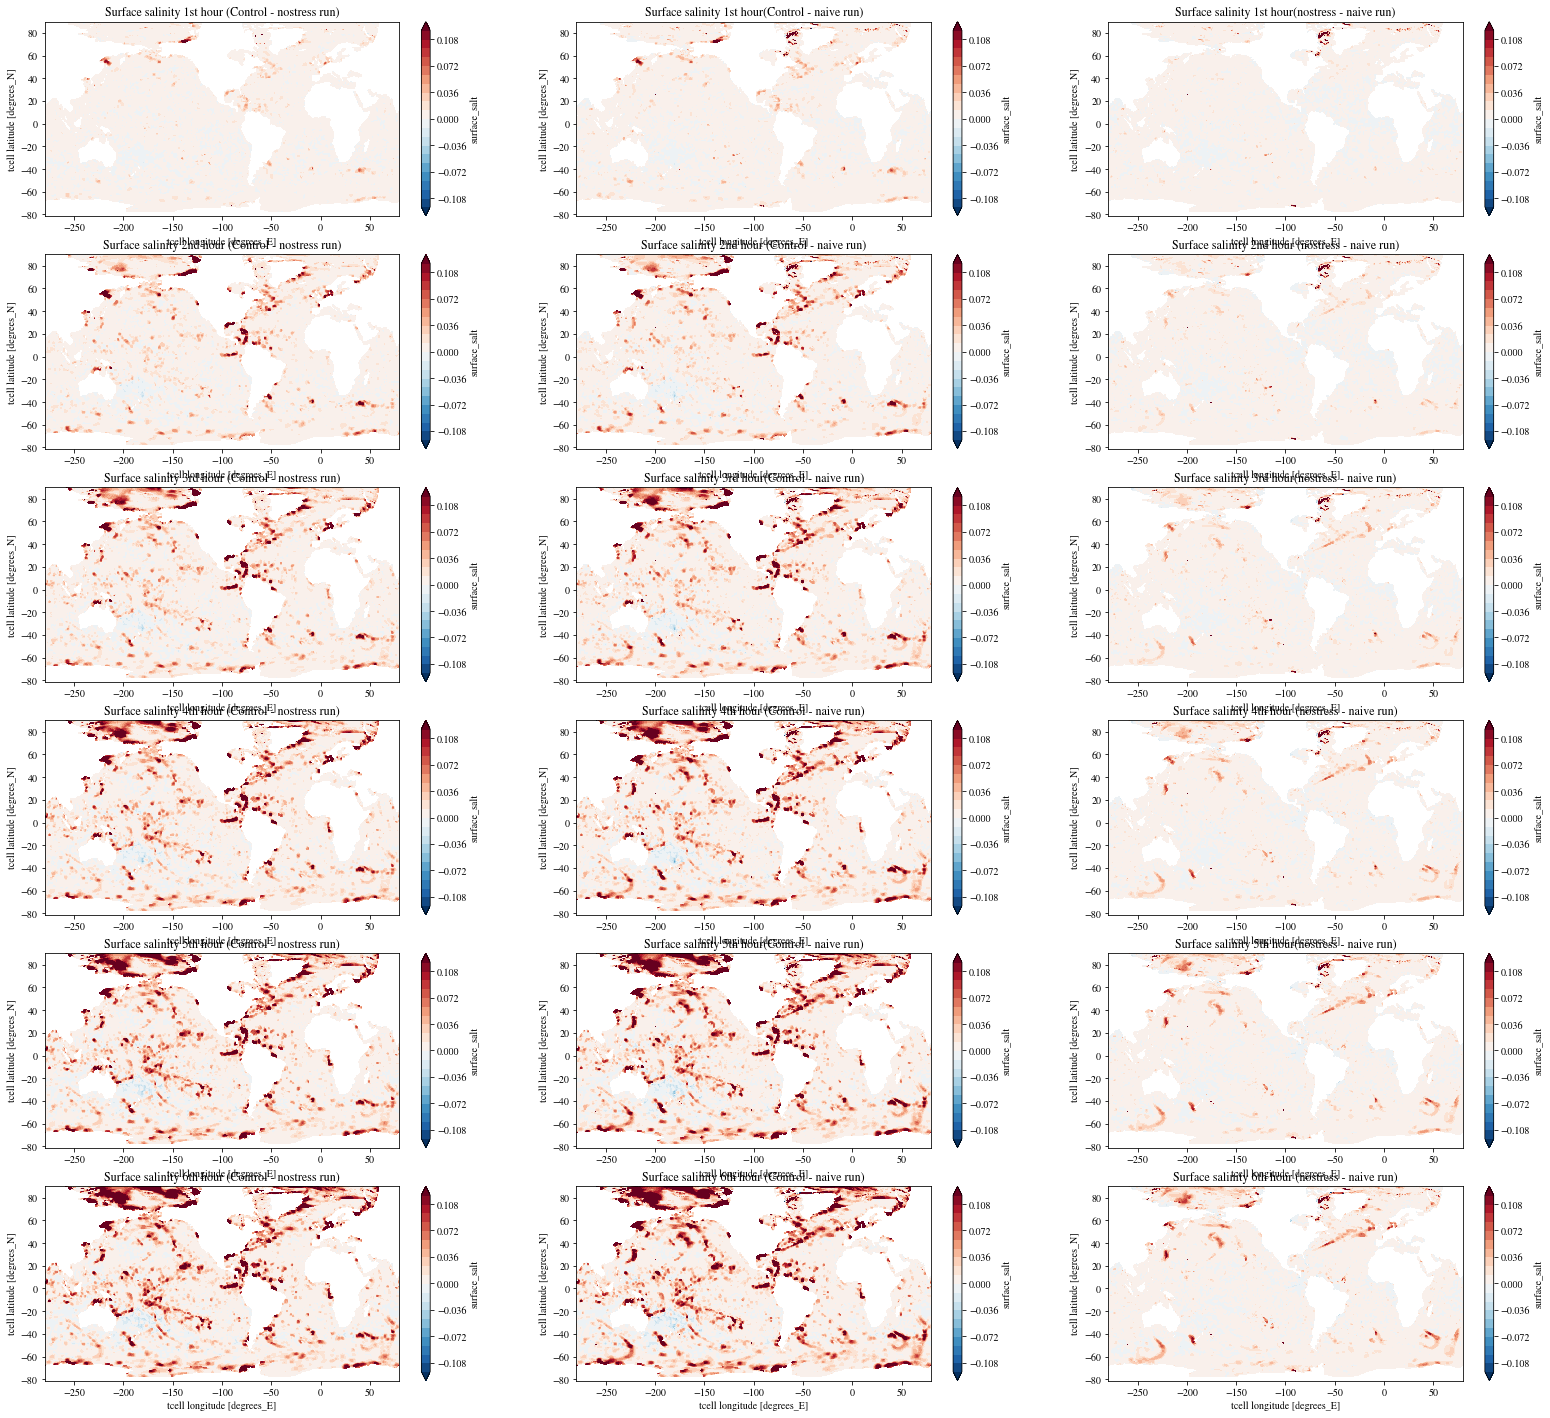

In [12]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,25))

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.12,0.12,21))
axes[0][0].set_title('Surface salinity 1st hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.12,0.12,21))
axes[0][1].set_title('Surface salinity 1st hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.12,0.12,21))
axes[0][2].set_title('Surface salinity 1st hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.12,0.12,21))
axes[1][0].set_title('Surface salinity 2nd hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.12,0.12,21))
axes[1][1].set_title('Surface salinity 2nd hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.12,0.12,21))
axes[1][2].set_title('Surface salinity 2nd hour (nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-0.12,0.12,21))
axes[2][0].set_title('Surface salinity 3rd hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-0.12,0.12,21))
axes[2][1].set_title('Surface salinity 3rd hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-0.12,0.12,21))
axes[2][2].set_title('Surface salinity 3rd hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-0.12,0.12,21))
axes[3][0].set_title('Surface salinity 4th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-0.12,0.12,21))
axes[3][1].set_title('Surface salinity 4th hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-0.12,0.12,21))
axes[3][2].set_title('Surface salinity 4th hour (nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-0.12,0.12,21))
axes[4][0].set_title('Surface salinity 5th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-0.12,0.12,21))
axes[4][1].set_title('Surface salinity 5th hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-0.12,0.12,21))
axes[4][2].set_title('Surface salinity 5th hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-0.12,0.12,21))
axes[5][0].set_title('Surface salinity 6th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-0.12,0.12,21))
axes[5][1].set_title('Surface salinity 6th hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-0.12,0.12,21))
axes[5][2].set_title('Surface salinity 6th hour (nostress - naive run)')

Text(0.5, 1.0, 'Freshwater input 6th hour (Nostress - naive run)')

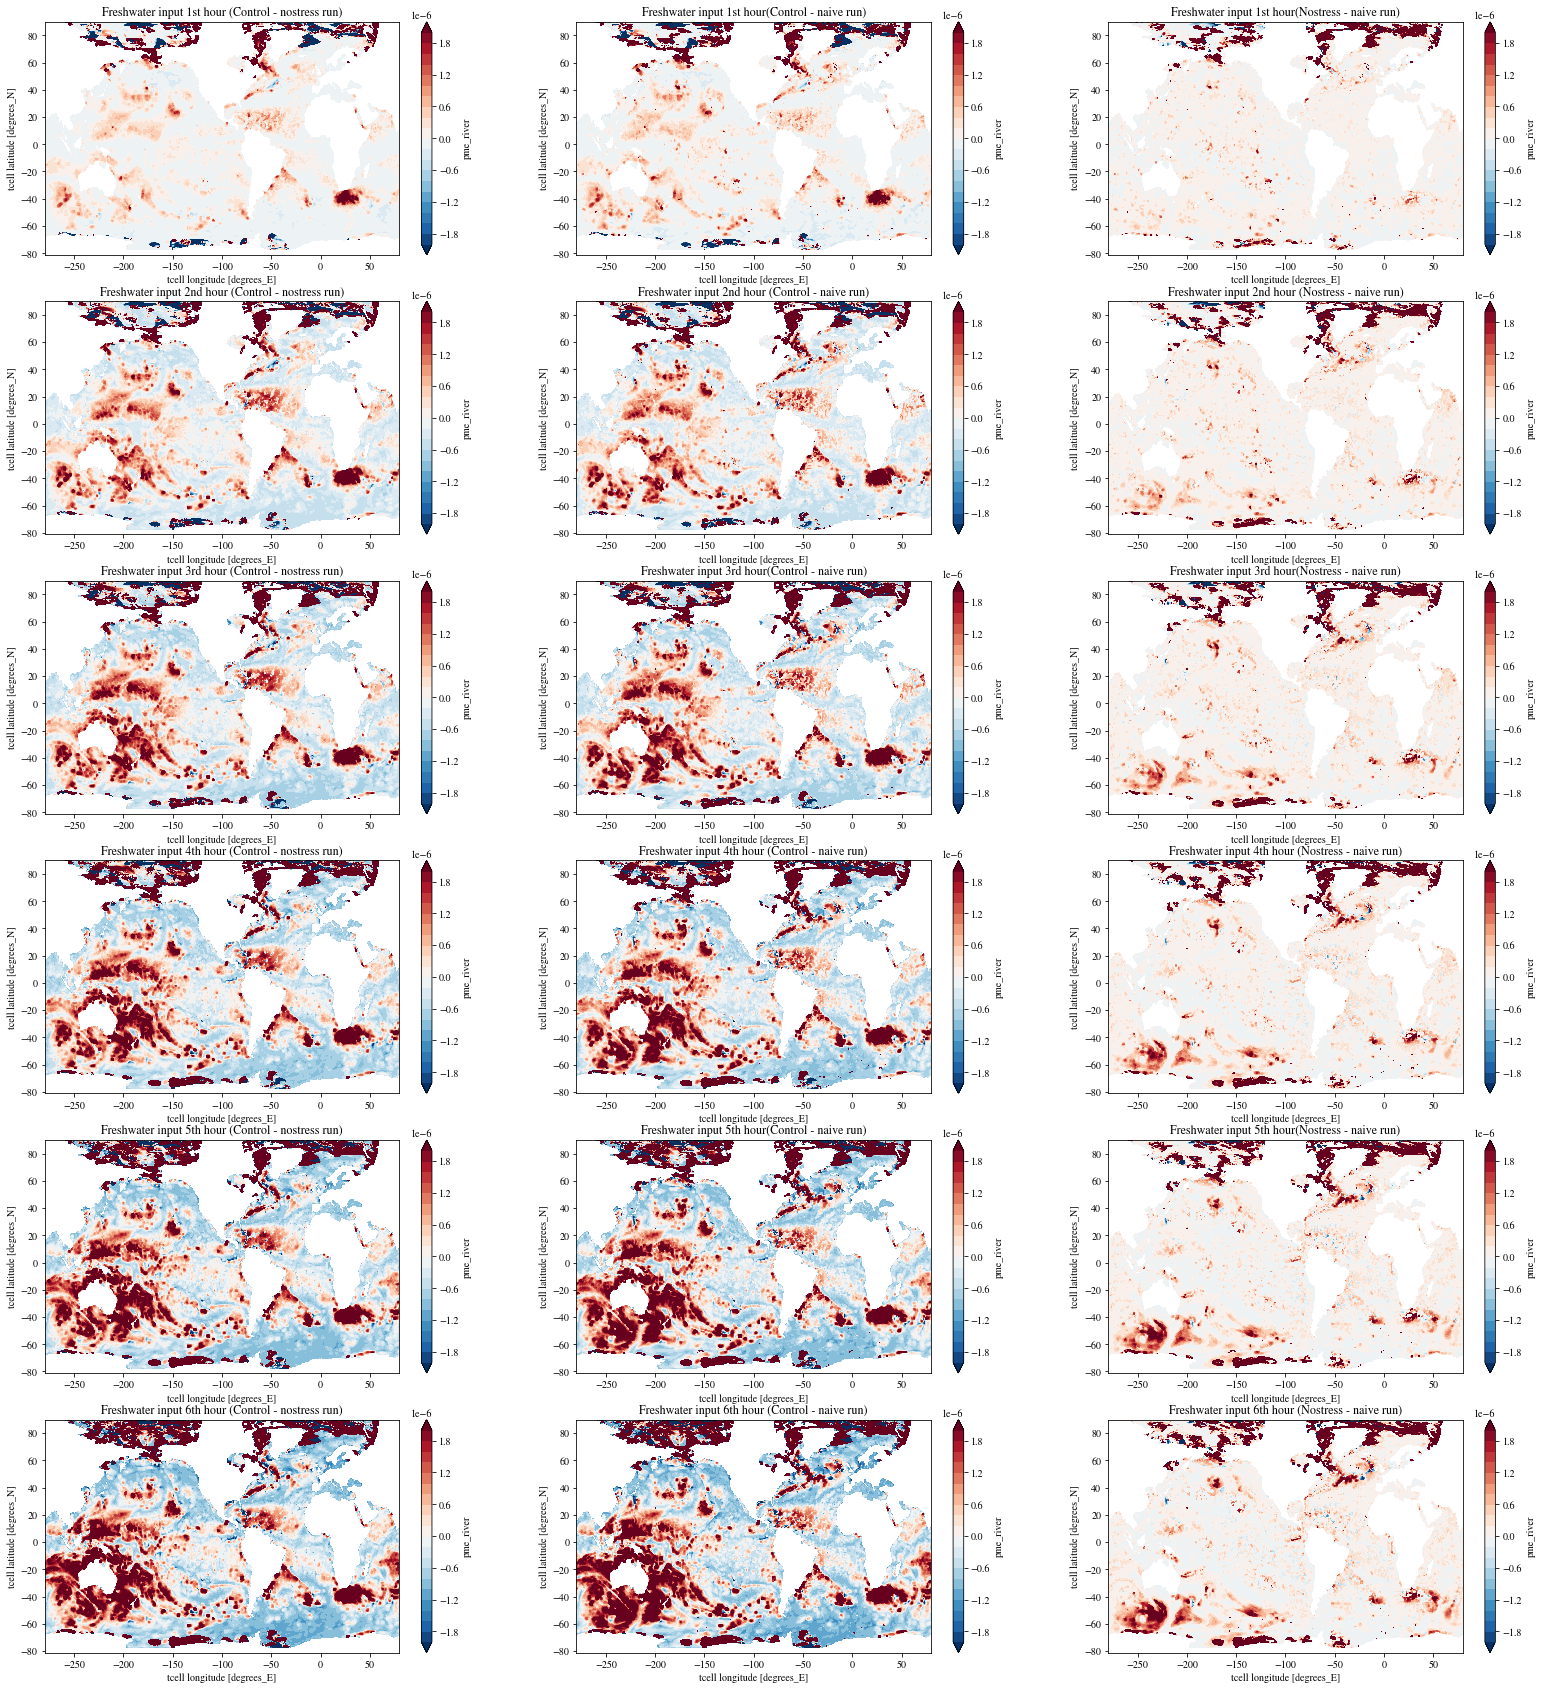

In [13]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-2e-6,2e-6,21))
axes[0][0].set_title('Freshwater input 1st hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-2e-6,2e-6,21))
axes[0][1].set_title('Freshwater input 1st hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-2e-6,2e-6,21))
axes[0][2].set_title('Freshwater input 1st hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-2e-6,2e-6,21))
axes[1][0].set_title('Freshwater input 2nd hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-2e-6,2e-6,21))
axes[1][1].set_title('Freshwater input 2nd hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-2e-6,2e-6,21))
axes[1][2].set_title('Freshwater input 2nd hour (Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-2e-6,2e-6,21))
axes[2][0].set_title('Freshwater input 3rd hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-2e-6,2e-6,21))
axes[2][1].set_title('Freshwater input 3rd hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-2e-6,2e-6,21))
axes[2][2].set_title('Freshwater input 3rd hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-2e-6,2e-6,21))
axes[3][0].set_title('Freshwater input 4th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-2e-6,2e-6,21))
axes[3][1].set_title('Freshwater input 4th hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-2e-6,2e-6,21))
axes[3][2].set_title('Freshwater input 4th hour (Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-2e-6,2e-6,21))
axes[4][0].set_title('Freshwater input 5th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-2e-6,2e-6,21))
axes[4][1].set_title('Freshwater input 5th hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-2e-6,2e-6,21))
axes[4][2].set_title('Freshwater input 5th hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-2e-6,2e-6,21))
axes[5][0].set_title('Freshwater input 6th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-2e-6,2e-6,21))
axes[5][1].set_title('Freshwater input 6th hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-2e-6,2e-6,21))
axes[5][2].set_title('Freshwater input 6th hour (Nostress - naive run)')

Text(0.5, 1.0, 'KPP mixing layer 6th hour (Nostress - naive run)')

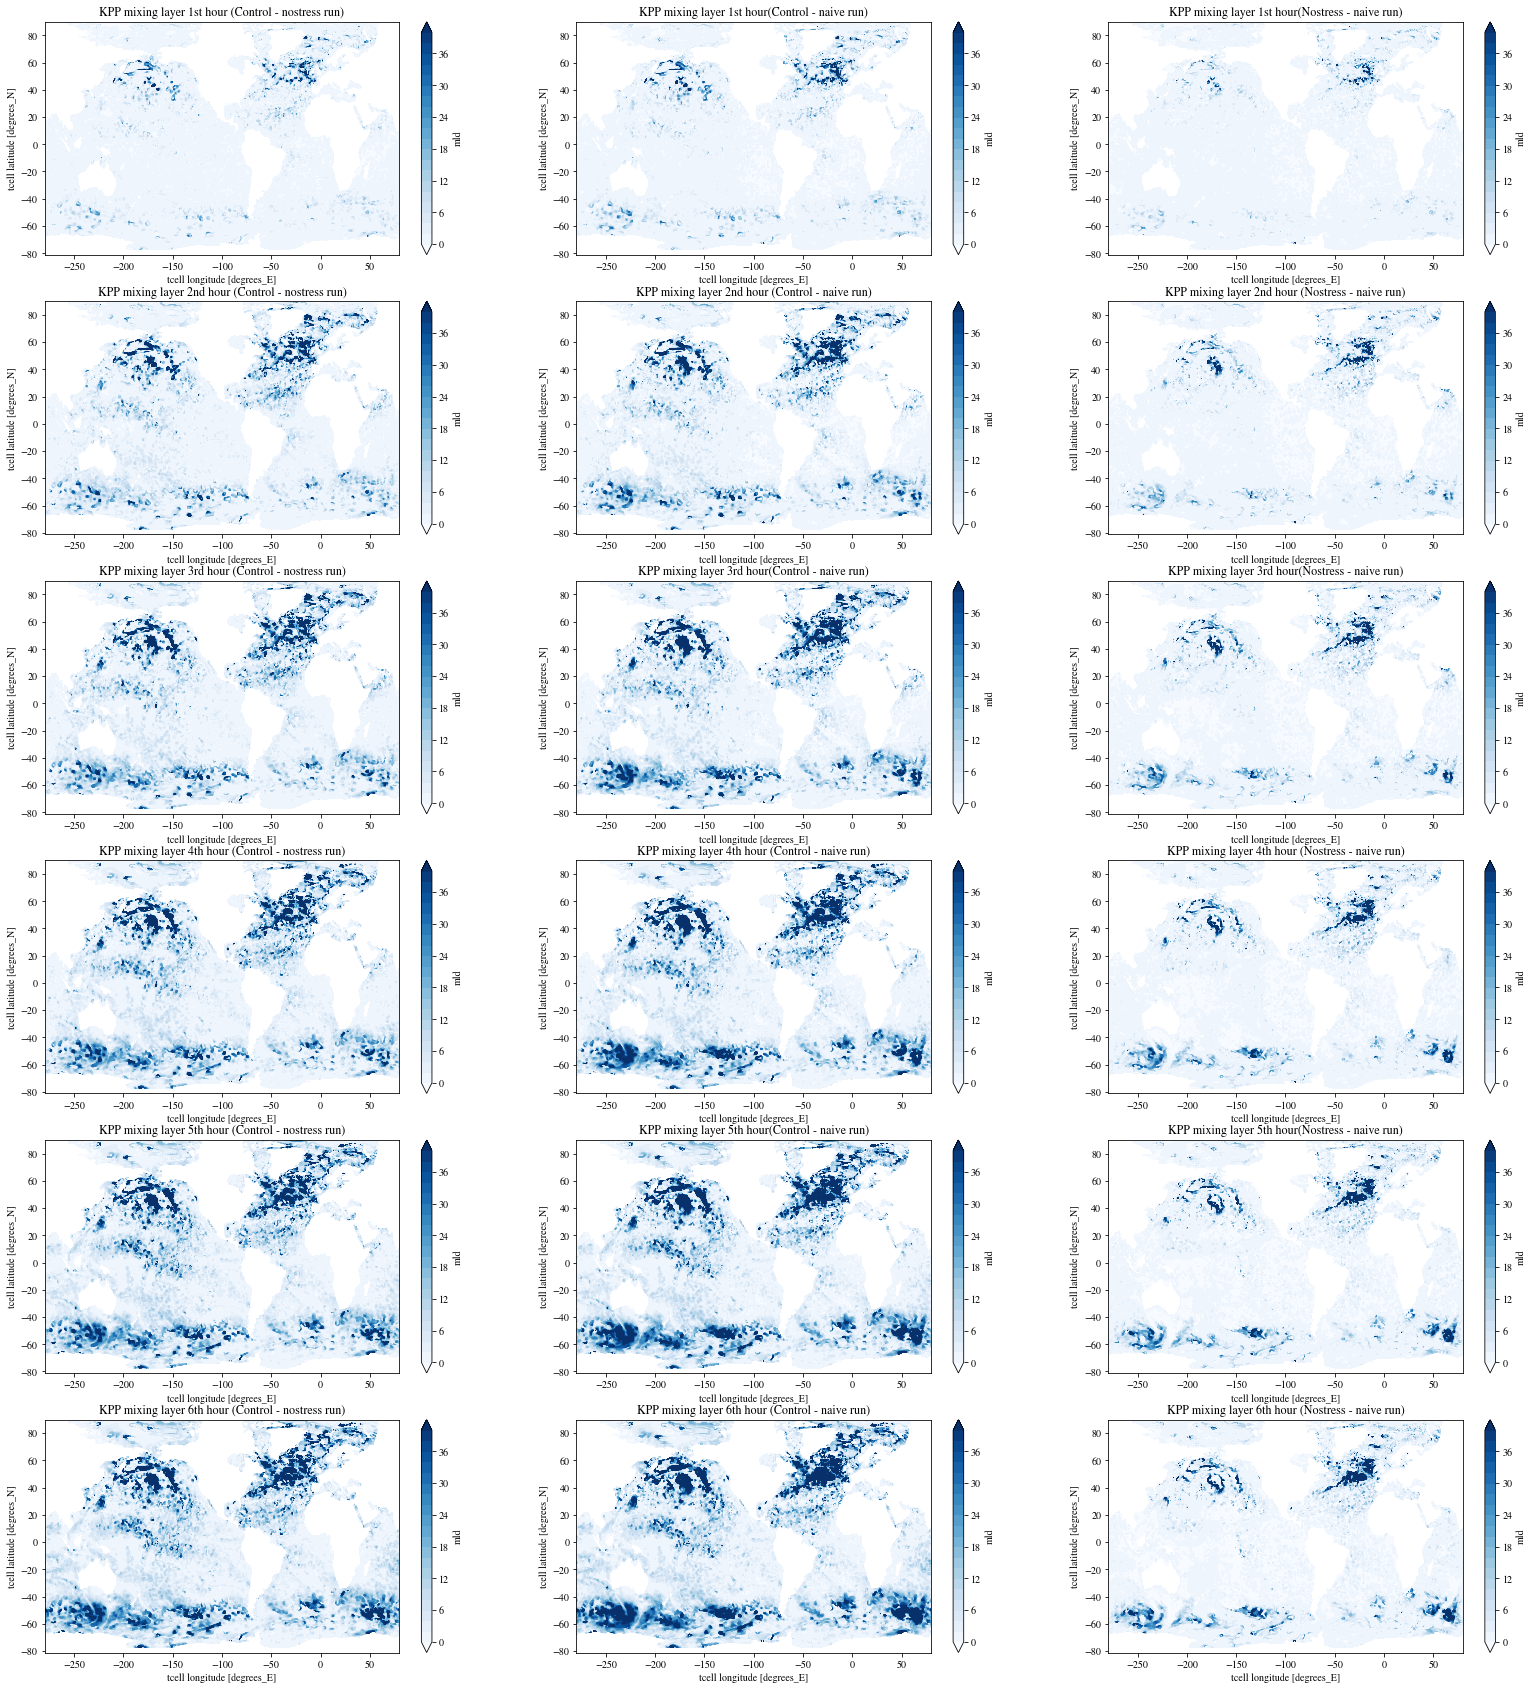

In [21]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0,40,21),cmap = 'Blues')
axes[0][0].set_title('KPP mixing layer 1st hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[0][1].set_title('KPP mixing layer 1st hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[0][2].set_title('KPP mixing layer 1st hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][0].set_title('KPP mixing layer 2nd hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][1].set_title('KPP mixing layer 2nd hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][2].set_title('KPP mixing layer 2nd hour (Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][0].set_title('KPP mixing layer 3rd hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][1].set_title('KPP mixing layer 3rd hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][2].set_title('KPP mixing layer 3rd hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][0].set_title('KPP mixing layer 4th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][1].set_title('KPP mixing layer 4th hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][2].set_title('KPP mixing layer 4th hour (Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][0].set_title('KPP mixing layer 5th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][1].set_title('KPP mixing layer 5th hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][2].set_title('KPP mixing layer 5th hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][0].set_title('KPP mixing layer 6th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][1].set_title('KPP mixing layer 6th hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][2].set_title('KPP mixing layer 6th hour (Nostress - naive run)')

Text(0.5, 1.0, 'Surface heat flux 6th hour (Nostress - naive run)')

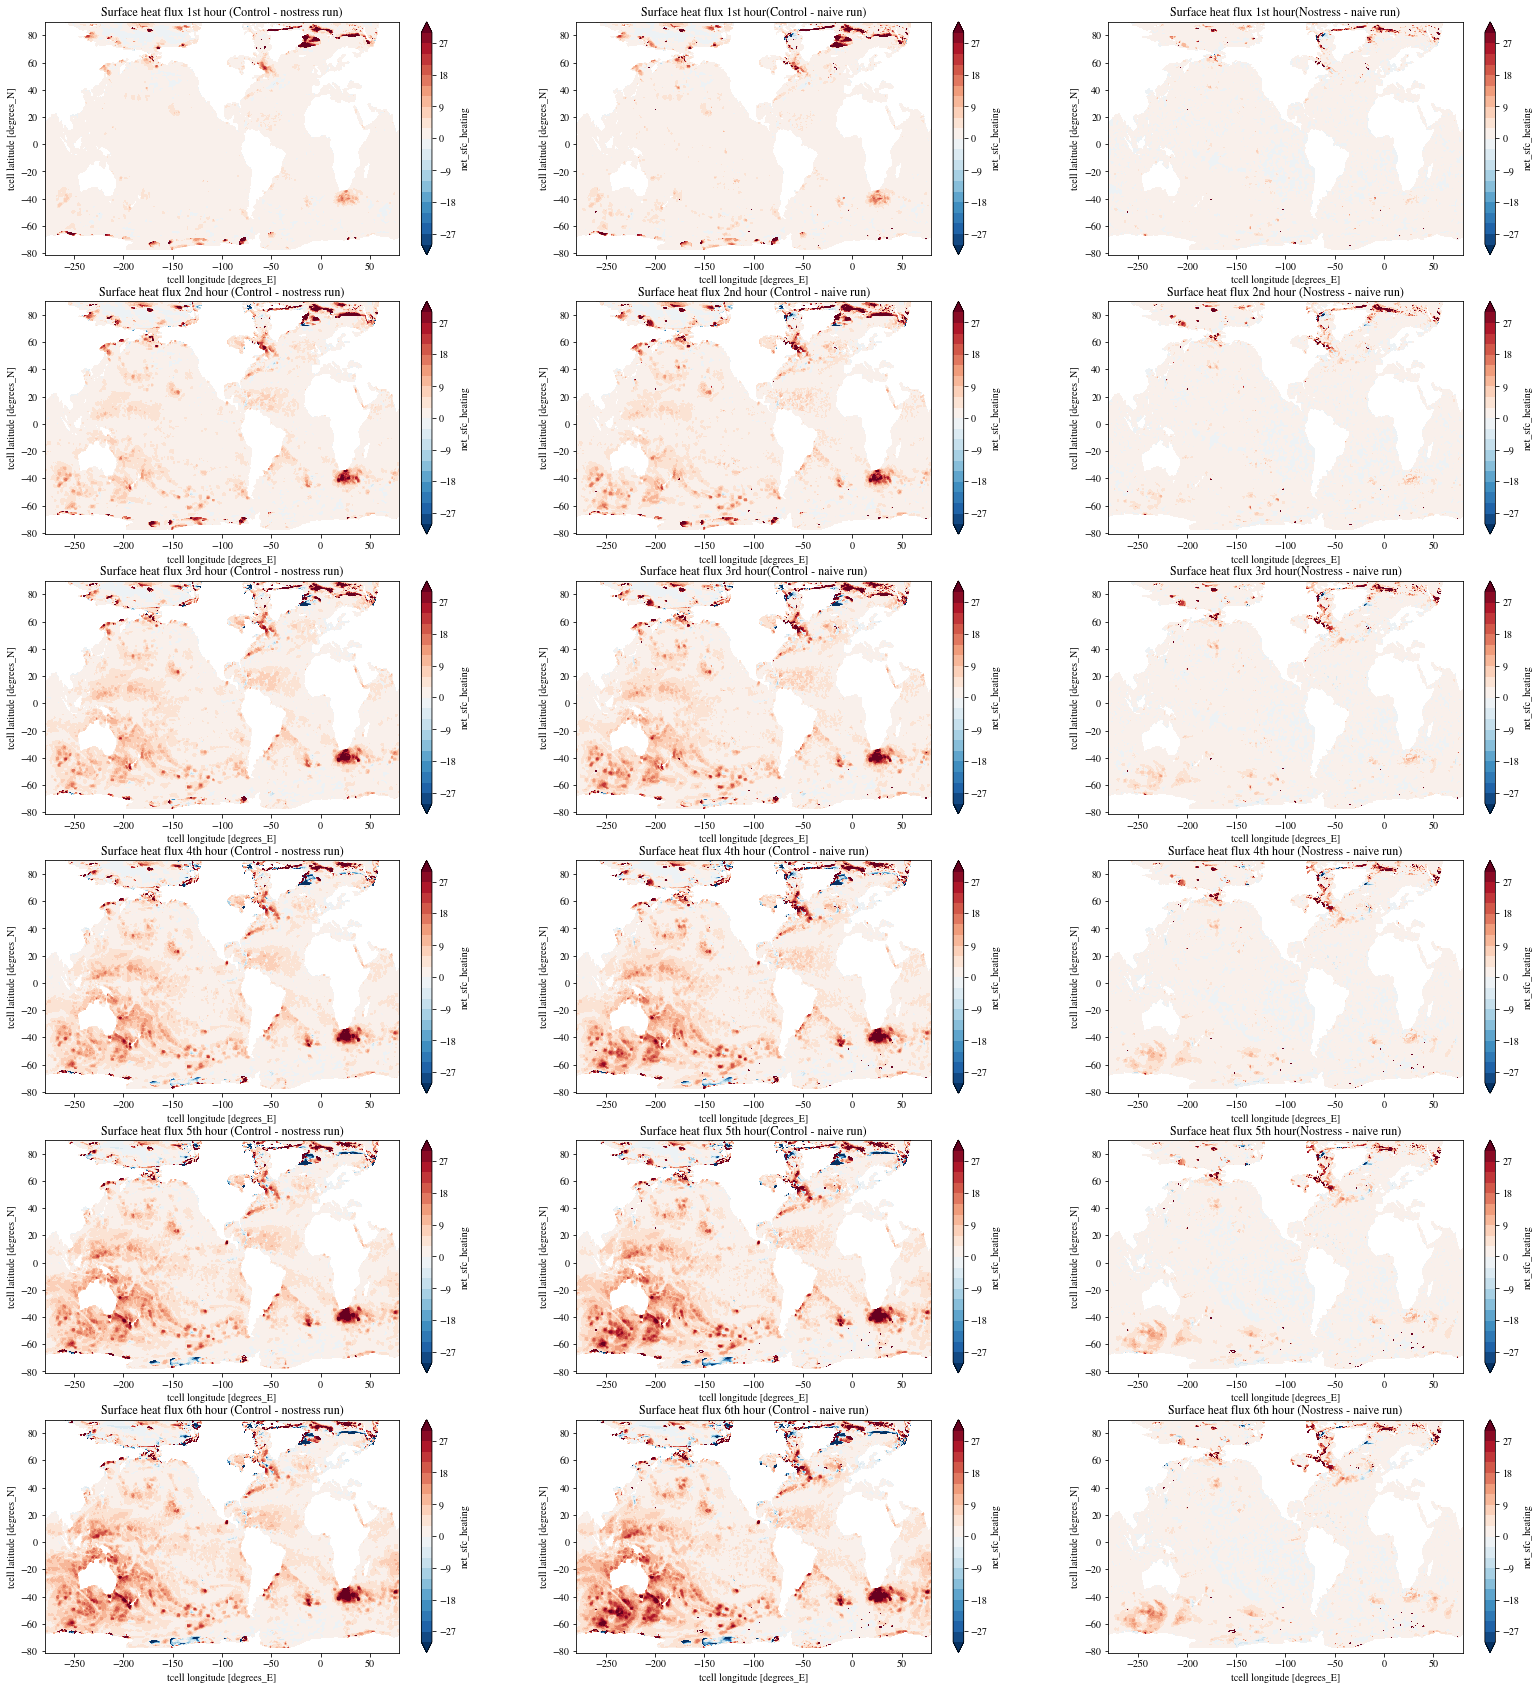

In [22]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-30,30,21))
axes[0][0].set_title('Surface heat flux 1st hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-30,30,21))
axes[0][1].set_title('Surface heat flux 1st hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-30,30,21))
axes[0][2].set_title('Surface heat flux 1st hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-30,30,21))
axes[1][0].set_title('Surface heat flux 2nd hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-30,30,21))
axes[1][1].set_title('Surface heat flux 2nd hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-30,30,21))
axes[1][2].set_title('Surface heat flux 2nd hour (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-30,30,21))
axes[2][0].set_title('Surface heat flux 3rd hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-30,30,21))
axes[2][1].set_title('Surface heat flux 3rd hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-30,30,21))
axes[2][2].set_title('Surface heat flux 3rd hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-30,30,21))
axes[3][0].set_title('Surface heat flux 4th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-30,30,21))
axes[3][1].set_title('Surface heat flux 4th hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-30,30,21))
axes[3][2].set_title('Surface heat flux 4th hour (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-30,30,21))
axes[4][0].set_title('Surface heat flux 5th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-30,30,21))
axes[4][1].set_title('Surface heat flux 5th hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-30,30,21))
axes[4][2].set_title('Surface heat flux 5th hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-30,30,21))
axes[5][0].set_title('Surface heat flux 6th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-30,30,21))
axes[5][1].set_title('Surface heat flux 6th hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-30,30,21))
axes[5][2].set_title('Surface heat flux 6th hour (Nostress - naive run)')

# Time series analysis

## A. North Atlantic Region

### KPP mixing layer

In [23]:
area_t = cc.querying.getvar(expt=expt[0], variable='area_t', session=session, frequency='static', n=1)

In [57]:
area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))

hblt_avg_con = (hblt_con*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo = (hblt_buo*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive = (hblt_naive*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

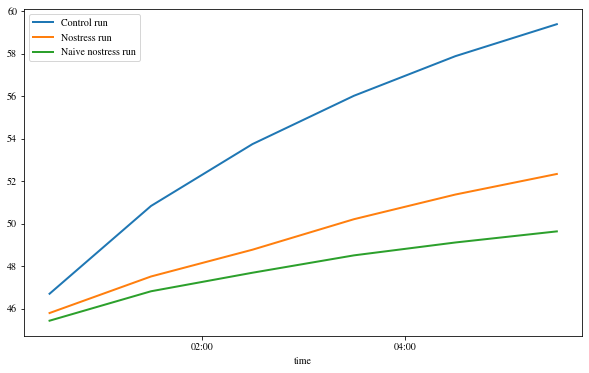

In [58]:
plt.figure(figsize = (10,6))
hblt_avg_con.plot(label = 'Control run')
hblt_avg_buo.plot(label = 'Nostress run')
hblt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

In [59]:
#Is this possible in one hour??
hblt_con.sel(xt_ocean = -15, method = 'nearest').sel(yt_ocean = 55, method = 'nearest').values

array([172.42593, 167.97594, 166.09573, 258.4196 , 304.08038, 327.6234 ],
      dtype=float32)

In [60]:
#Another peculiar thing
hblt_con.sel(xt_ocean = -15, method = 'nearest').sel(yt_ocean = -45, method = 'nearest').values

array([ 6.9260564,  9.1306095, 15.8545475, 25.739613 , 35.343754 ,
       40.63181  ], dtype=float32)

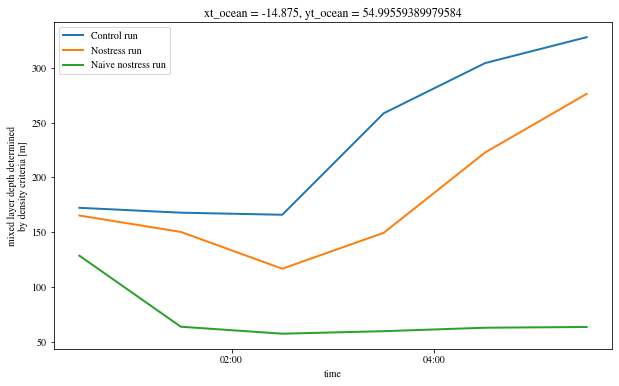

In [48]:
plt.figure(figsize = (10,6))
hblt_con.sel(xt_ocean = -15, method = 'nearest').sel(yt_ocean = 55, method = 'nearest').plot(label = 'Control run')
hblt_buo.sel(xt_ocean = -15, method = 'nearest').sel(yt_ocean = 55, method = 'nearest').plot(label = 'Nostress run')
hblt_naive.sel(xt_ocean = -15, method = 'nearest').sel(yt_ocean = 55, method = 'nearest').plot(label = 'Naive nostress run')
plt.legend()

### Surface temperature

In [55]:
temp_avg_con = (temp_sfc_con*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo = (temp_sfc_buo*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive = (temp_sfc_naive*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

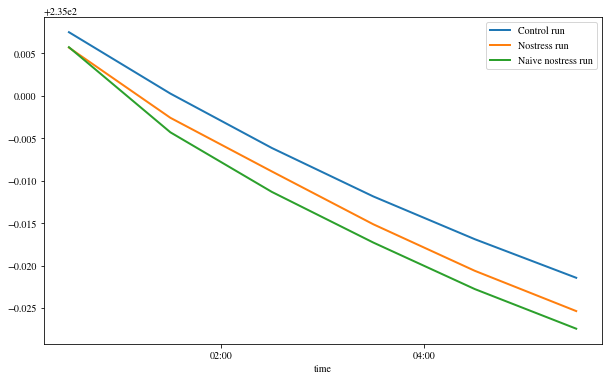

In [56]:
plt.figure(figsize = (10,6))
temp_avg_con.plot(label = 'Control run')
temp_avg_buo.plot(label = 'Nostress run')
temp_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface Salinity

In [61]:
salt_avg_con = (salt_sfc_con*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo = (salt_sfc_buo*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive = (salt_sfc_naive*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

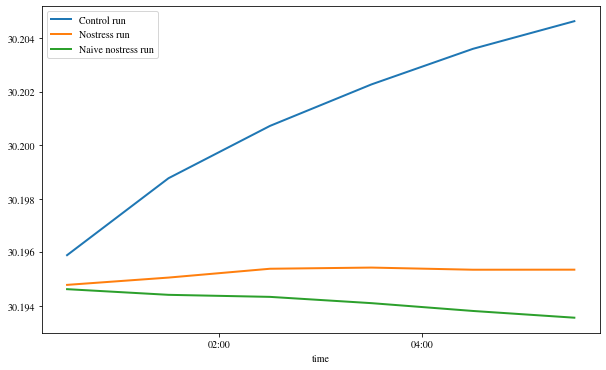

In [75]:
plt.figure(figsize = (10,6))
salt_avg_con.plot(label = 'Control run')
salt_avg_buo.plot(label = 'Nostress run')
salt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Freshwater Flux

In [65]:
pme_river_avg_con = (pme_river_con*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo = (pme_river_buo*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive = (pme_river_naive*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

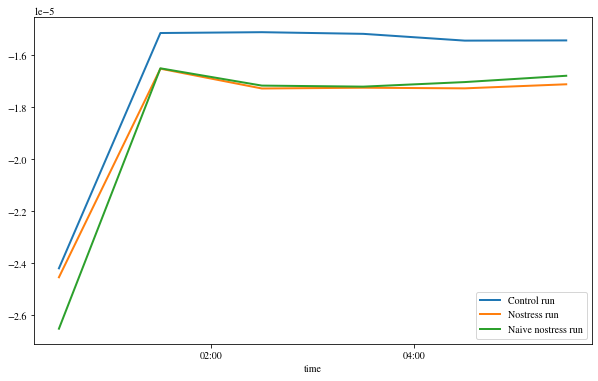

In [66]:
plt.figure(figsize = (10,6))
pme_river_avg_con.plot(label = 'Control run')
pme_river_avg_buo.plot(label = 'Nostress run')
pme_river_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

In [67]:
heat_sfc_avg_con = (heat_sfc_con*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo = (heat_sfc_buo*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive = (heat_sfc_naive*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

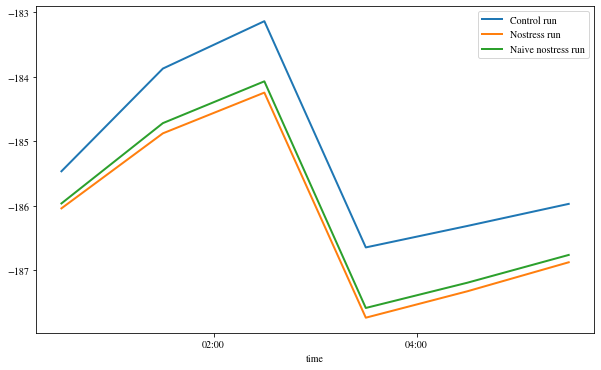

In [68]:
plt.figure(figsize = (10,6))
heat_sfc_avg_con.plot(label = 'Control run')
heat_sfc_avg_buo.plot(label = 'Nostress run')
heat_sfc_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

## North Pacific

### KPP Mixing Layer

In [69]:
area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))

hblt_avg_con = (hblt_con*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo = (hblt_buo*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive = (hblt_naive*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

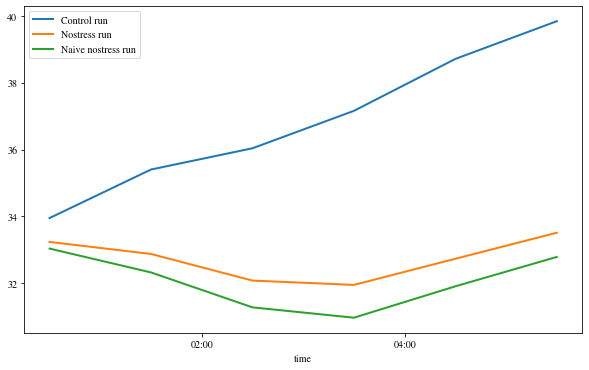

In [70]:
plt.figure(figsize = (10,6))
hblt_avg_con.plot(label = 'Control run')
hblt_avg_buo.plot(label = 'Nostress run')
hblt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface Temperature

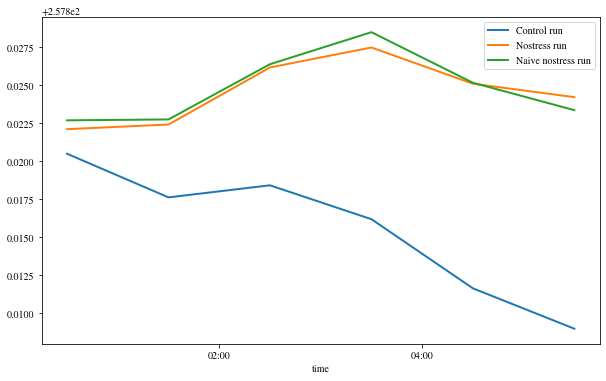

In [72]:
temp_avg_con = (temp_sfc_con*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo = (temp_sfc_buo*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive = (temp_sfc_naive*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
temp_avg_con.plot(label = 'Control run')
temp_avg_buo.plot(label = 'Nostress run')
temp_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface salinity

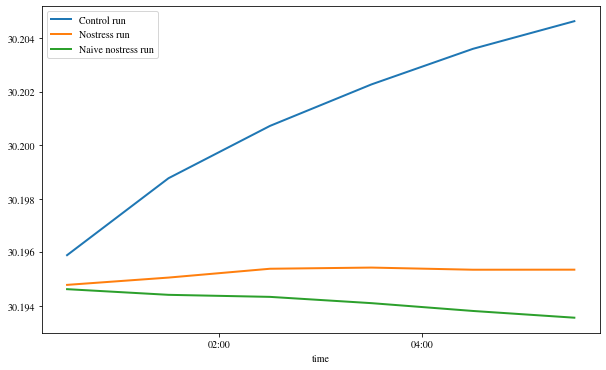

In [74]:
salt_avg_con = (salt_sfc_con*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo = (salt_sfc_buo*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive = (salt_sfc_naive*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
salt_avg_con.plot(label = 'Control run')
salt_avg_buo.plot(label = 'Nostress run')
salt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Freshwater Input

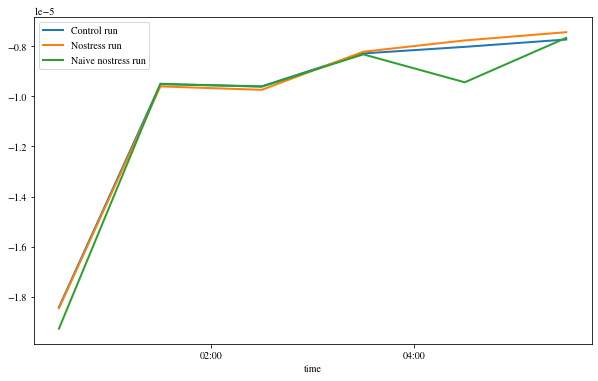

In [76]:
pme_river_avg_con = (pme_river_con*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo = (pme_river_buo*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive = (pme_river_naive*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
pme_river_avg_con.plot(label = 'Control run')
pme_river_avg_buo.plot(label = 'Nostress run')
pme_river_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface heat flux

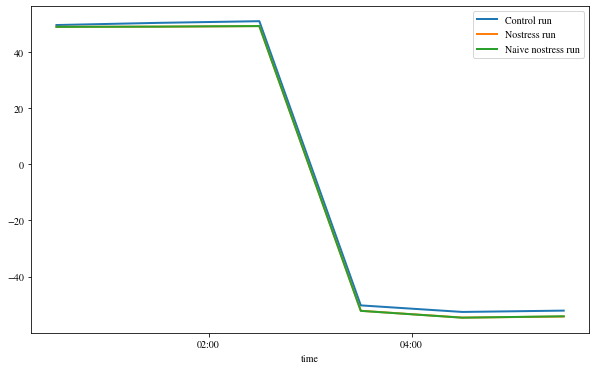

In [77]:
heat_sfc_avg_con = (heat_sfc_con*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo = (heat_sfc_buo*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive = (heat_sfc_naive*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
heat_sfc_avg_con.plot(label = 'Control run')
heat_sfc_avg_buo.plot(label = 'Nostress run')
heat_sfc_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

## South Pacific

### KPP Mixing layer

In [78]:
area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))

hblt_avg_con = (hblt_con*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo = (hblt_buo*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive = (hblt_naive*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

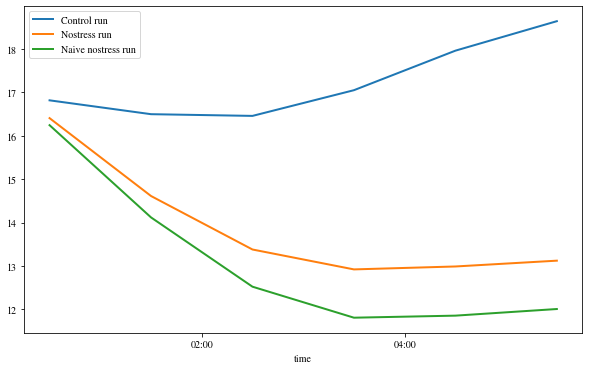

In [79]:
plt.figure(figsize = (10,6))
hblt_avg_con.plot(label = 'Control run')
hblt_avg_buo.plot(label = 'Nostress run')
hblt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface temperature

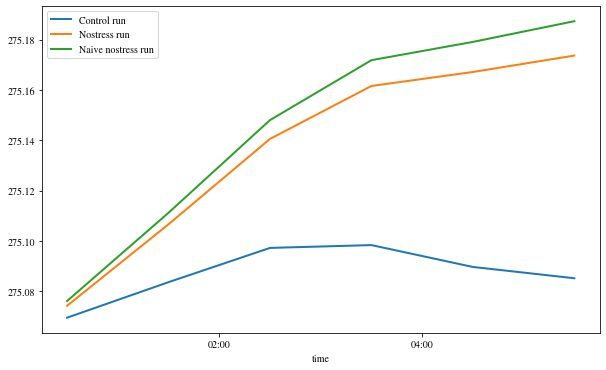

In [80]:
temp_avg_con = (temp_sfc_con*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo = (temp_sfc_buo*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive = (temp_sfc_naive*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
temp_avg_con.plot(label = 'Control run')
temp_avg_buo.plot(label = 'Nostress run')
temp_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface Salinity

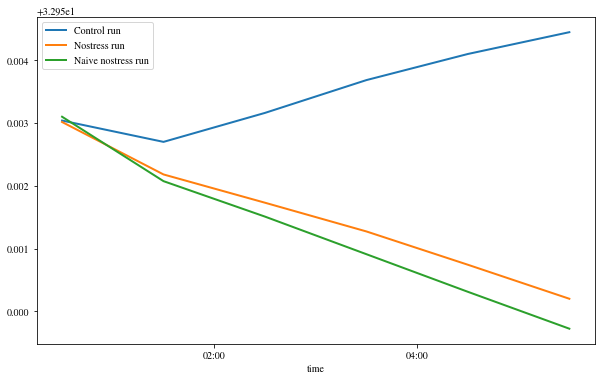

In [82]:
salt_avg_con = (salt_sfc_con*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo = (salt_sfc_buo*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive = (salt_sfc_naive*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
salt_avg_con.plot(label = 'Control run')
salt_avg_buo.plot(label = 'Nostress run')
salt_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Freshwater input

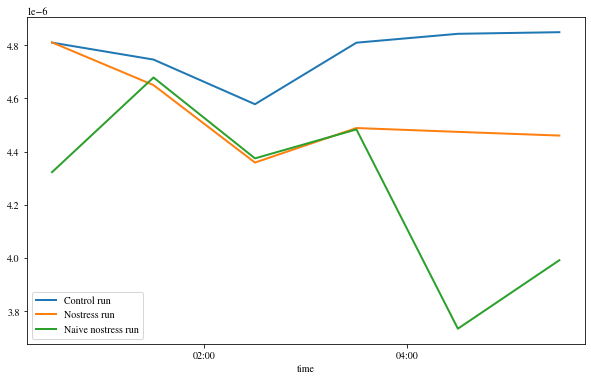

In [83]:
pme_river_avg_con = (pme_river_con*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo = (pme_river_buo*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive = (pme_river_naive*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
pme_river_avg_con.plot(label = 'Control run')
pme_river_avg_buo.plot(label = 'Nostress run')
pme_river_avg_naive.plot(label = 'Naive nostress run')
plt.legend()

### Surface heat flux

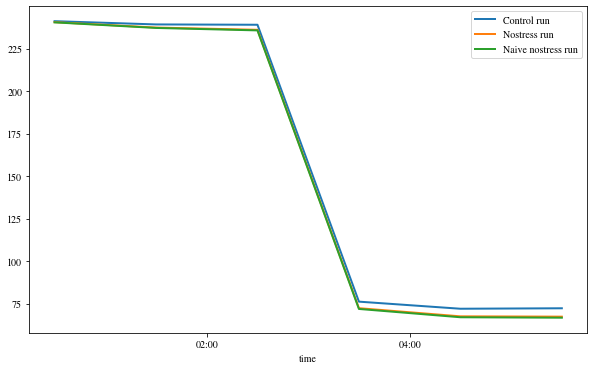

In [84]:
heat_sfc_avg_con = (heat_sfc_con*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo = (heat_sfc_buo*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive = (heat_sfc_naive*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

plt.figure(figsize = (10,6))
heat_sfc_avg_con.plot(label = 'Control run')
heat_sfc_avg_buo.plot(label = 'Nostress run')
heat_sfc_avg_naive.plot(label = 'Naive nostress run')
plt.legend()